# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create initial empty lists for values
city_ls = []
cityid_ls = []
lats_ls = []
lngs_ls = []
max_temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speed_ls = []
country_ls = []
date_ls = []

# Create the base url for API call
base_url ="https://api.openweathermap.org/data/2.5/weather?q="

# Create counters for processing log
record_count = 0
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")
#Create a for loop that will allow you to go through each or the randomly generated cities
for city in cities:

    # Exception handling to check if the city is not found by the API call
    try:
        # Query url for the API call
        query_url = f"{base_url}{city}&units=imperial&appid={weather_api_key}"
        weather_response = requests.get(query_url).json()
        
        # Data to collect from the API call
        lats_ls.append(weather_response["coord"]["lat"])
        lngs_ls.append(weather_response["coord"]["lon"])
        max_temp_ls.append(weather_response["main"]["temp_max"])
        humidity_ls.append(weather_response["main"]["humidity"])
        cloudiness_ls.append(weather_response["clouds"]["all"])
        wind_speed_ls.append(weather_response["wind"]["speed"])
        country_ls.append(weather_response["sys"]["country"])
        date_ls.append(weather_response["dt"])
        cityid_ls.append(weather_response["id"])

        # If/Else statement to create the processing log 
        if record_count < 50:
            record_count =  record_count + 1
            city_ls.append(city)
            
            # Print processing log
            print(f"Processing Record {record_count} of Set {set_count} | City: {city} | ID Number: {cityid_ls[record_count-1]} ")
           
           # Add sleep second to help not go over API call limiy
            time.sleep(1.1)

        else:
            set_count = set_count + 1
            record_count = 0
            city_ls.append(city)
     
    # The exception if the city is not found by the API call       
    except:
        # Print processing log error
        print("City not found. Skipping...")
        
print("-----------------------------")
print("  Data Retrieval Complete  ")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | City: yellowknife | ID Number: 6185377 
Processing Record 2 of Set 1 | City: cape town | ID Number: 3369157 
Processing Record 3 of Set 1 | City: butaritari | ID Number: 2110227 
Processing Record 4 of Set 1 | City: kavieng | ID Number: 2094342 
Processing Record 5 of Set 1 | City: khatanga | ID Number: 2022572 
Processing Record 6 of Set 1 | City: san isidro | ID Number: 3929631 
City not found. Skipping...
Processing Record 7 of Set 1 | City: new norfolk | ID Number: 2155415 
Processing Record 8 of Set 1 | City: sao domingos | ID Number: 3449293 
Processing Record 9 of Set 1 | City: punta arenas | ID Number: 3874787 
Processing Record 10 of Set 1 | City: hobart | ID Number: 2163355 
Processing Record 11 of Set 1 | City: kapaa | ID Number: 5848280 
Processing Record 12 of Set 1 | City: dambulla | ID Number: 1248749 
Processing Record 13 of Set 1 | City: bethel | ID Number: 5282297 
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the data collected in a DataFrame
current_weather_data = pd.DataFrame({
  "City": city_ls,
  "Lat": lats_ls,
  "Lng": lngs_ls,
  "Max Temp":  max_temp_ls,
  "Humidity": humidity_ls,
  "Cloudiness": cloudiness_ls,
  "Wind Speed": wind_speed_ls,
  "Country": country_ls,
  "Date": date_ls
   })
current_weather_data.head(25)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,-34.60,73,90,5.82,CA,1608209715
1,cape town,-33.93,18.42,77.00,50,20,21.92,ZA,1608209461
2,butaritari,3.07,172.79,81.95,80,100,15.17,KI,1608209718
3,kavieng,-2.57,150.80,83.71,73,100,7.81,PG,1608209719
4,khatanga,71.97,102.50,-27.83,82,0,7.96,RU,1608209720
5,san isidro,-12.12,-77.05,68.00,82,0,10.29,PE,1608209721
6,new norfolk,-42.78,147.06,59.00,91,100,1.30,AU,1608209723
7,sao domingos,-13.40,-46.32,82.85,49,53,7.96,BR,1608209724
8,punta arenas,-53.15,-70.92,44.60,70,40,34.45,CL,1608209725
9,hobart,-42.88,147.33,59.00,93,75,6.93,AU,1608209703


In [5]:
#Output the data to a csv
current_weather_data.to_csv("output_data/current_weather_data.csv", index= False)

In [6]:
#Use describe to generate descriptive statistics
current_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,21.495428,16.431798,50.818493,73.489726,57.150685,8.556164,1.608210e+09
std,32.550365,91.084121,32.376243,19.716078,40.552081,5.983108,2.099530e+02
min,-54.800000,-175.200000,-50.800000,1.000000,0.000000,0.290000,1.608209e+09
25%,-4.582500,-65.485000,27.960000,64.750000,12.750000,4.465000,1.608210e+09
50%,25.925000,19.115000,59.000000,79.000000,75.000000,6.930000,1.608210e+09
75%,48.502500,100.375000,78.765000,87.000000,98.000000,11.410000,1.608210e+09
max,78.220000,179.320000,97.410000,100.000000,100.000000,34.450000,1.608210e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Locate cities with humidity over 100 (if applicable)
humid_over100 = current_weather_data.loc[current_weather_data["Humidity"] > 100]
humid_over100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
humid_over100.index

Int64Index([], dtype='int64')

In [9]:
# New DataFrame with humidity under 100.
clean_city_data = current_weather_data.loc[current_weather_data["Humidity"] <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,-34.60,73,90,5.82,CA,1608209715
1,cape town,-33.93,18.42,77.00,50,20,21.92,ZA,1608209461
2,butaritari,3.07,172.79,81.95,80,100,15.17,KI,1608209718
3,kavieng,-2.57,150.80,83.71,73,100,7.81,PG,1608209719
4,khatanga,71.97,102.50,-27.83,82,0,7.96,RU,1608209720


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

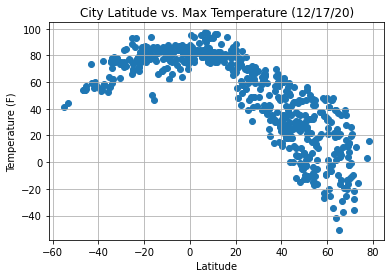

In [10]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Format the graph
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Max_Temp.png")

# Display the graph
plt.show()



## Latitude vs. Humidity Plot

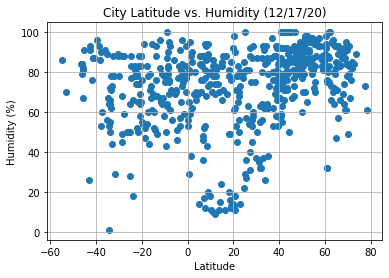

In [11]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Humidity ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Humidity.png")

# Display the graph
plt.show()

## Latitude vs. Cloudiness Plot

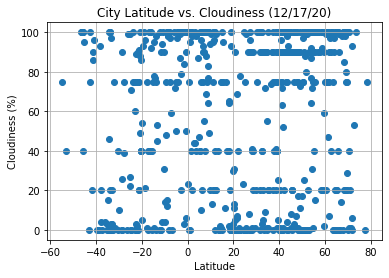

In [12]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Cloudiness.png")

# Display the graph
plt.show()

## Latitude vs. Wind Speed Plot

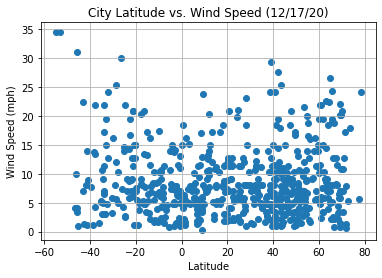

In [13]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Wind_Speed.png")

# Display the graph
plt.show()

## Linear Regression

In [14]:
#Create Northern & Southern Hemisphere dataframes
north_hem_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hem_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
south_hem_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,cape town,-33.93,18.42,77.00,50,20,21.92,ZA,1608209461
3,kavieng,-2.57,150.80,83.71,73,100,7.81,PG,1608209719
5,san isidro,-12.12,-77.05,68.00,82,0,10.29,PE,1608209721
6,new norfolk,-42.78,147.06,59.00,91,100,1.30,AU,1608209723
7,sao domingos,-13.40,-46.32,82.85,49,53,7.96,BR,1608209724


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8481480782027274


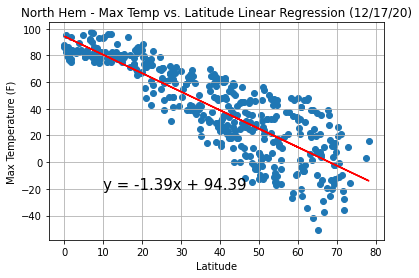

In [15]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Max Temp"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.title(f'North Hem - Max Temp vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Max_Temp.png")


# Display the information
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6363919168176476


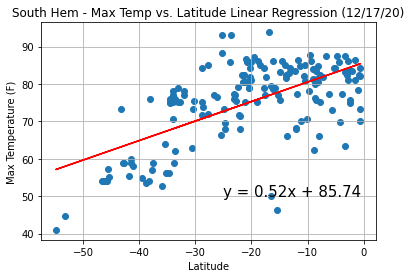

In [16]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Max Temp"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-25,50),fontsize=15,color="black")
plt.title(f'South Hem - Max Temp vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Max_Temp.png")


# Display the information
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3909859295410707


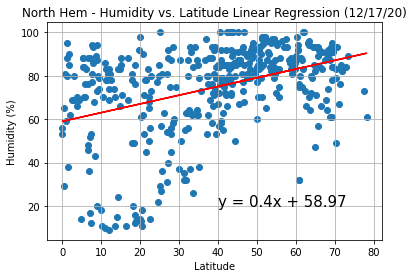

In [17]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Humidity"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(40,20),fontsize=15,color="black")
plt.title(f'North Hem - Humidity vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Humidity.png")


# Display the information
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0023438912050784376


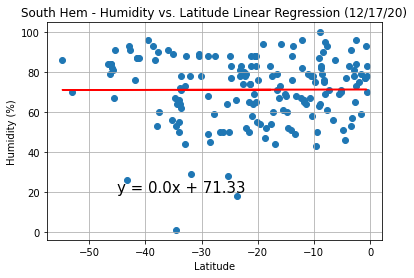

In [18]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Humidity"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-45,20),fontsize=15,color="black")
plt.title(f'South Hem - Humidity vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Humidity.png")


# Display the information
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.05979794601976233


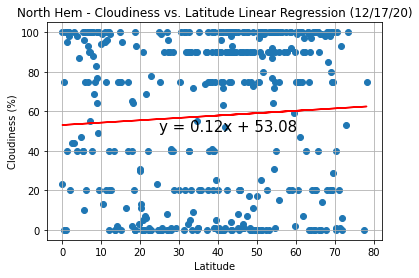

In [19]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Cloudiness"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(25,50),fontsize=15,color="black")
plt.title(f'North Hem - Cloudiness vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Cloudiness.png")


# Display the information
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.19860764965005465


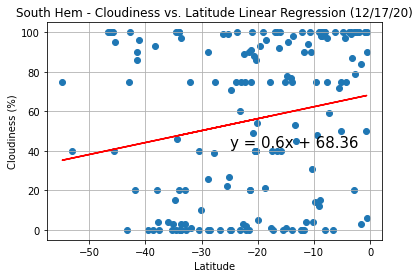

In [20]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Cloudiness"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-25,42),fontsize=15,color="black")
plt.title(f'South Hem - Cloudiness vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Cloudiness.png")


# Display the information
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.12152979845486071


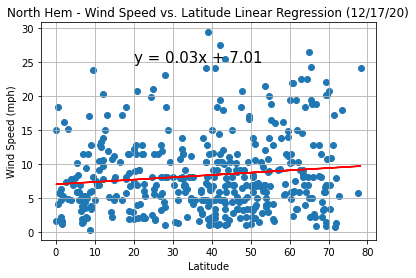

In [23]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Wind Speed"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(20,25),fontsize=15,color="black")
plt.title(f'North Hem - Wind Speed vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Wind_Speed.png")


# Display the information
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2447702724577814


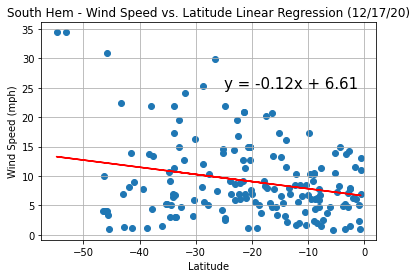

In [24]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Wind Speed"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-25,25),fontsize=15,color="black")
plt.title(f'South Hem - Wind Speed vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Wind_Speed.png")


# Display the information
plt.show()